在这个教程中，你将会学到如何绘制散点图和热力图

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>
    数据：<br><br>
1.出租车原始GPS数据(在data-sample文件夹下，原始数据集的抽样500辆车的数据)</p></div>

在实际的项目或者论文中，我们经常要绘制一下数据的分布情况，这就需要绘制散点图（以颜色代表数据量）或者热力图。可是很可惜我翻遍了matplotlib和seaborn的包都没有找到地图热力图的绘制方法，他们的热力图就是格子填颜色，这样子根本就不是我们想要的效果嘛！  
因此这一教程中，我尝试用contourf绘制热力图，效果还不错，分享给大家

# 数据集计处理

绘制数据分布的时候，首先第一步还是得将数据集计，得到每一个小范围内的数据量是多少。我这里采用的是经纬度小数点保留三位小数

In [1]:
import pandas as pd
#读取数据
data = pd.read_csv(r'C:\pythonscript\2020\pygeo-tutorial\data-sample\TaxiData-Sample',header = None)
#给数据命名列
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']

In [9]:
#经纬度小数点保留三位小数
data2 = data[['Lng','Lat']].round(3).copy()

#集计每个小范围内数据量
data2['count'] = 1
data2 = data2.groupby(['Lng','Lat'])['count'].count().reset_index()

#排序数据，让数据量小的放上面先画，数据大的放下面最后画
data2.sort_values(by = 'count')
data2.head(5)

Lng     Lat  count
0  108.002  10.280      1
1  110.801  20.267      1
2  110.809  20.269      1
3  110.852  20.283      1
4  110.893  20.297      1

# 散点图绘制

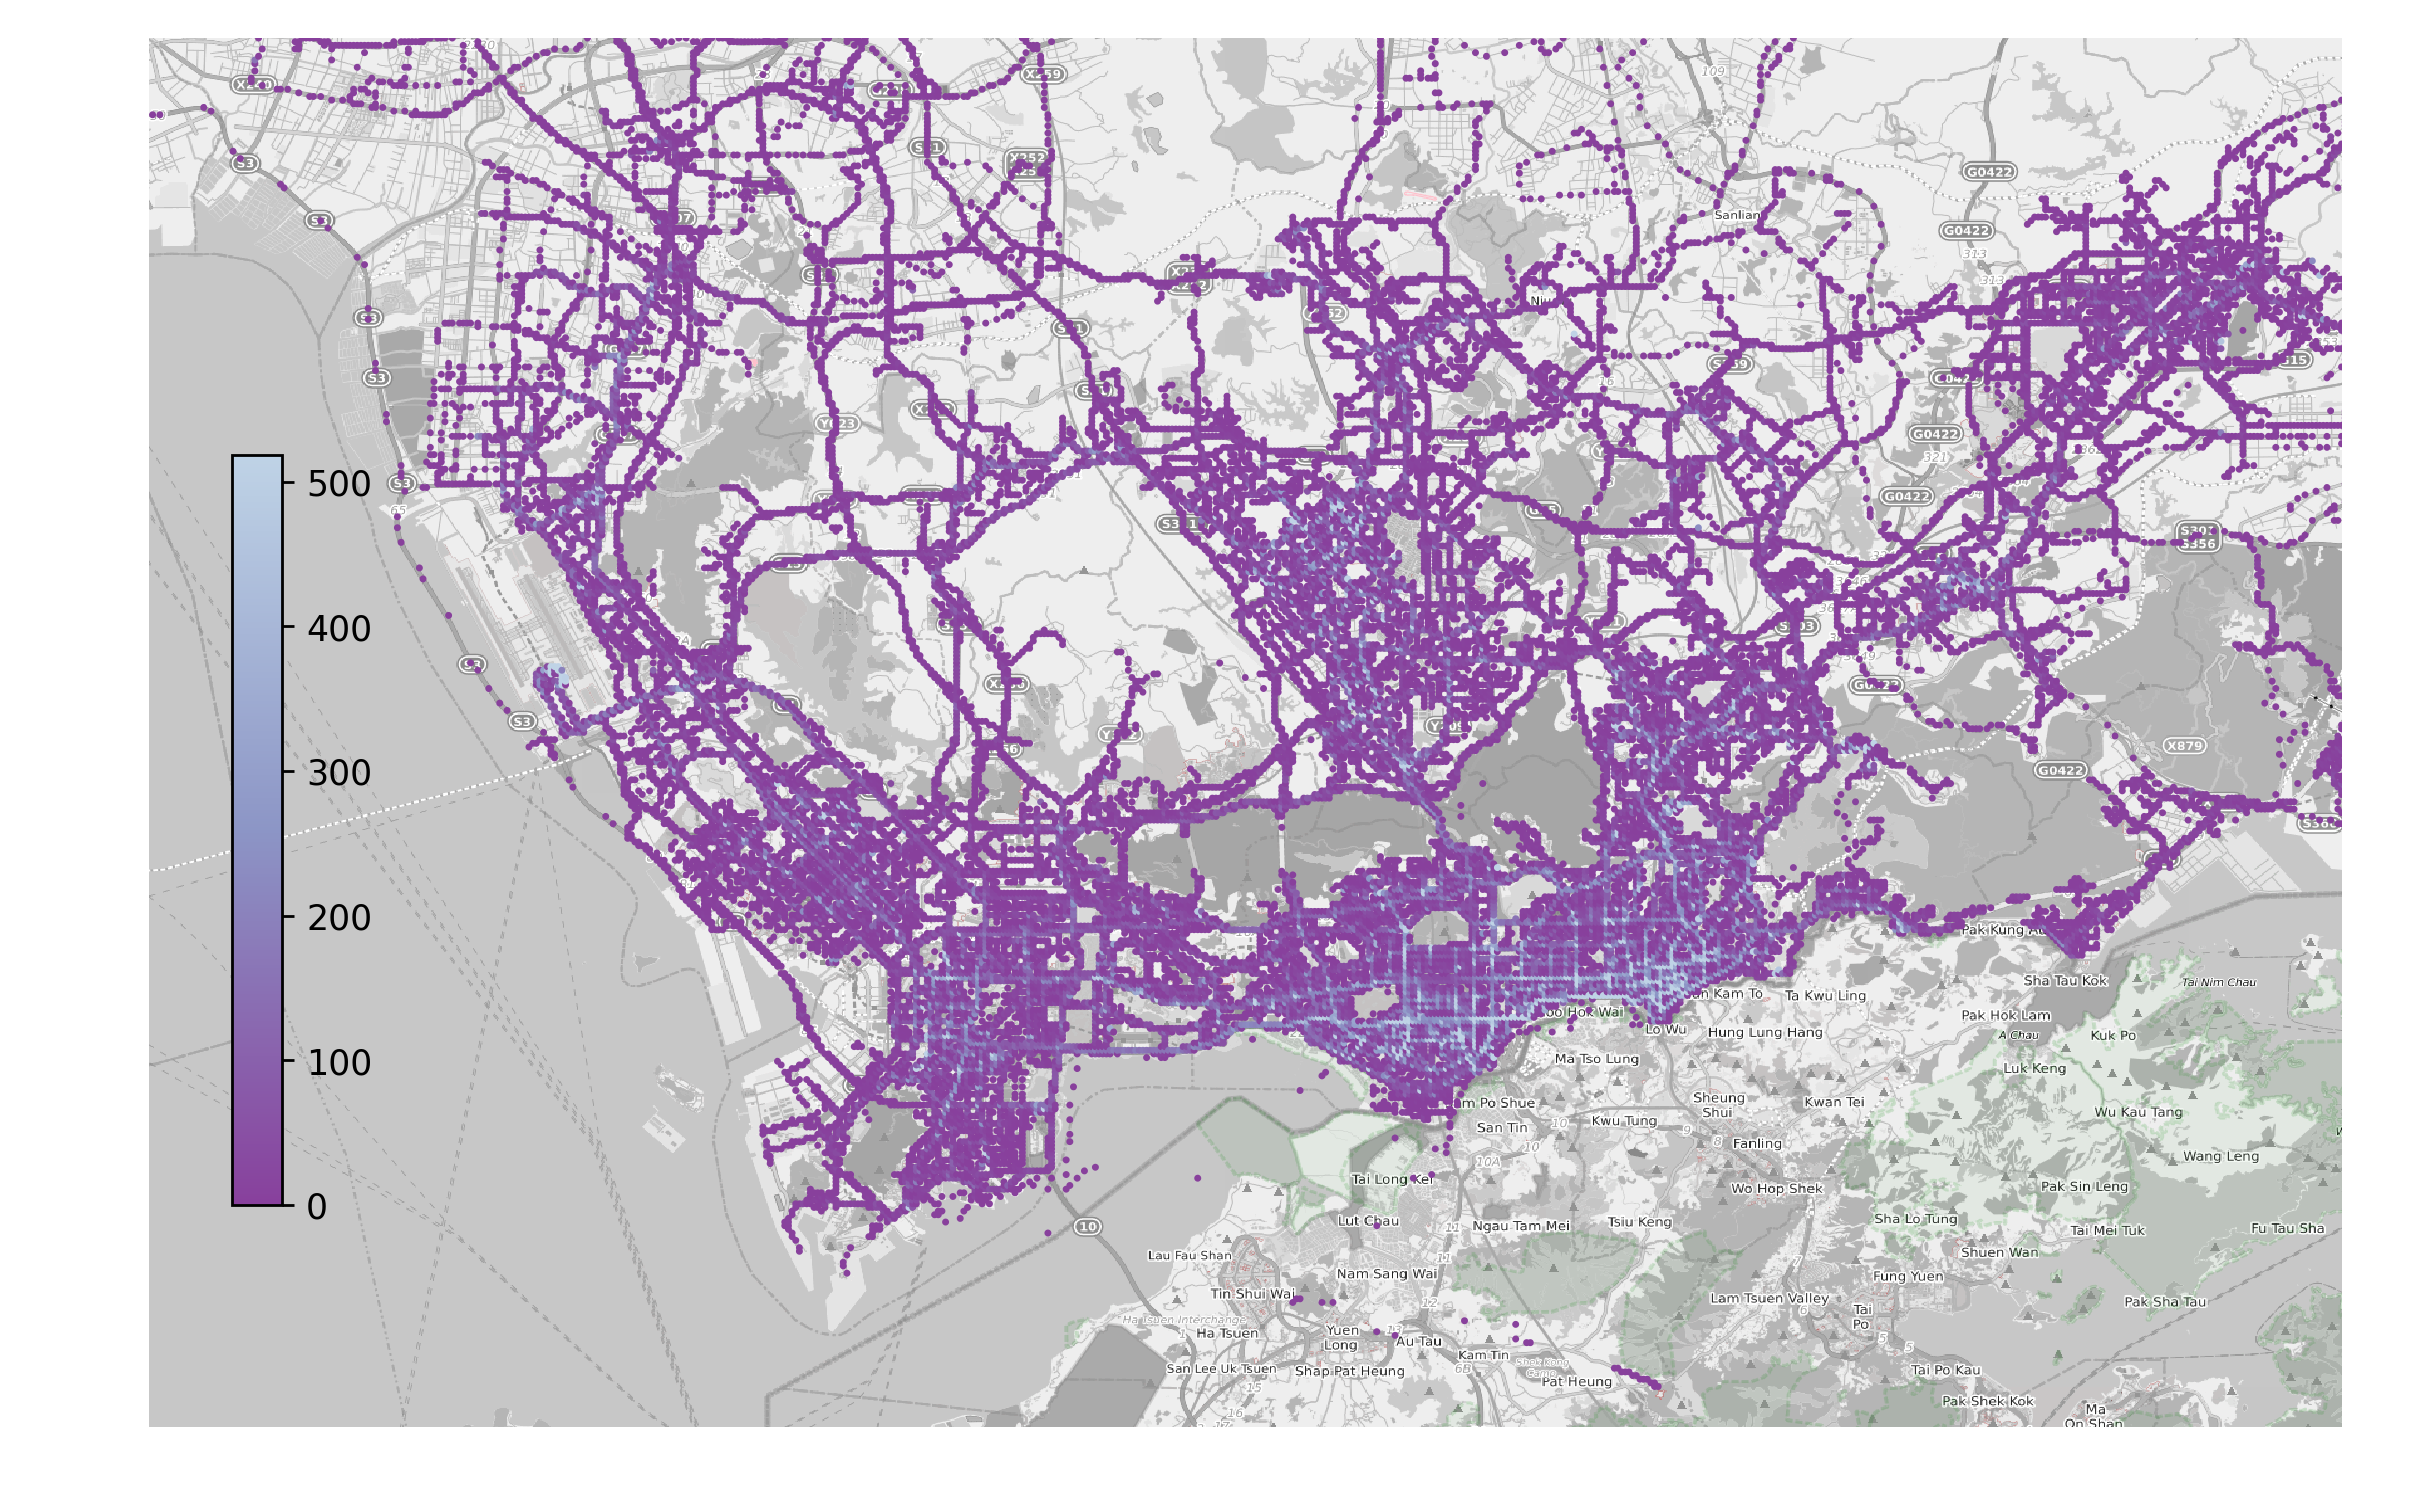

In [22]:
bounds = [113.7, 22.42, 114.3, 22.8]

#导入绘图包
import matplotlib as mpl
import matplotlib.pyplot as plt
import plot_map
import seaborn as sns

#   -- plot --
fig     = plt.figure(1,(10,10),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))#调整整体空白

#绘制底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)


#定义颜色并加上colorbar
pallete_name = "BuPu"
colors = sns.color_palette(pallete_name, 3)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors)

#标准化颜色
vmax = data2['count'].quantile(0.99)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)

#画上散点图
plt.scatter(data2['Lng'],data2['Lat'],s = 1,alpha = 1,c = data2['count'],cmap = cmap,norm=norm )

plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

#绘制假的colorbar
plt.imshow([[0,vmax]], cmap=cmap)
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
plt.colorbar(cax=cax)

plt.show()

# 热力图绘制

热力图绘制这里我们采用plt的contourf函数绘制，而contourf所传入的参数是一个矩阵形式

>plt.contourf(x,y,z, levels=levels, cmap=seismic_cmap,origin = 'lower')

这里传入的参数是
>x--一维横坐标  
y--一维纵坐标  
z--二维矩阵值  
levels--分层的颜色

<img src="resource/contourf.png" style="width:500px">

因此我们用pd.pivot透视表来生成x,y,z  
在这里我对z取一个log,这样可视化出来效果更优美

In [26]:
d = data2.pivot(columns = 'Lng',index = 'Lat',values = 'count').fillna(0)
z = np.log(d.values)
x = d.columns
y = d.index
levels = np.linspace(0, z.max(), 25)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


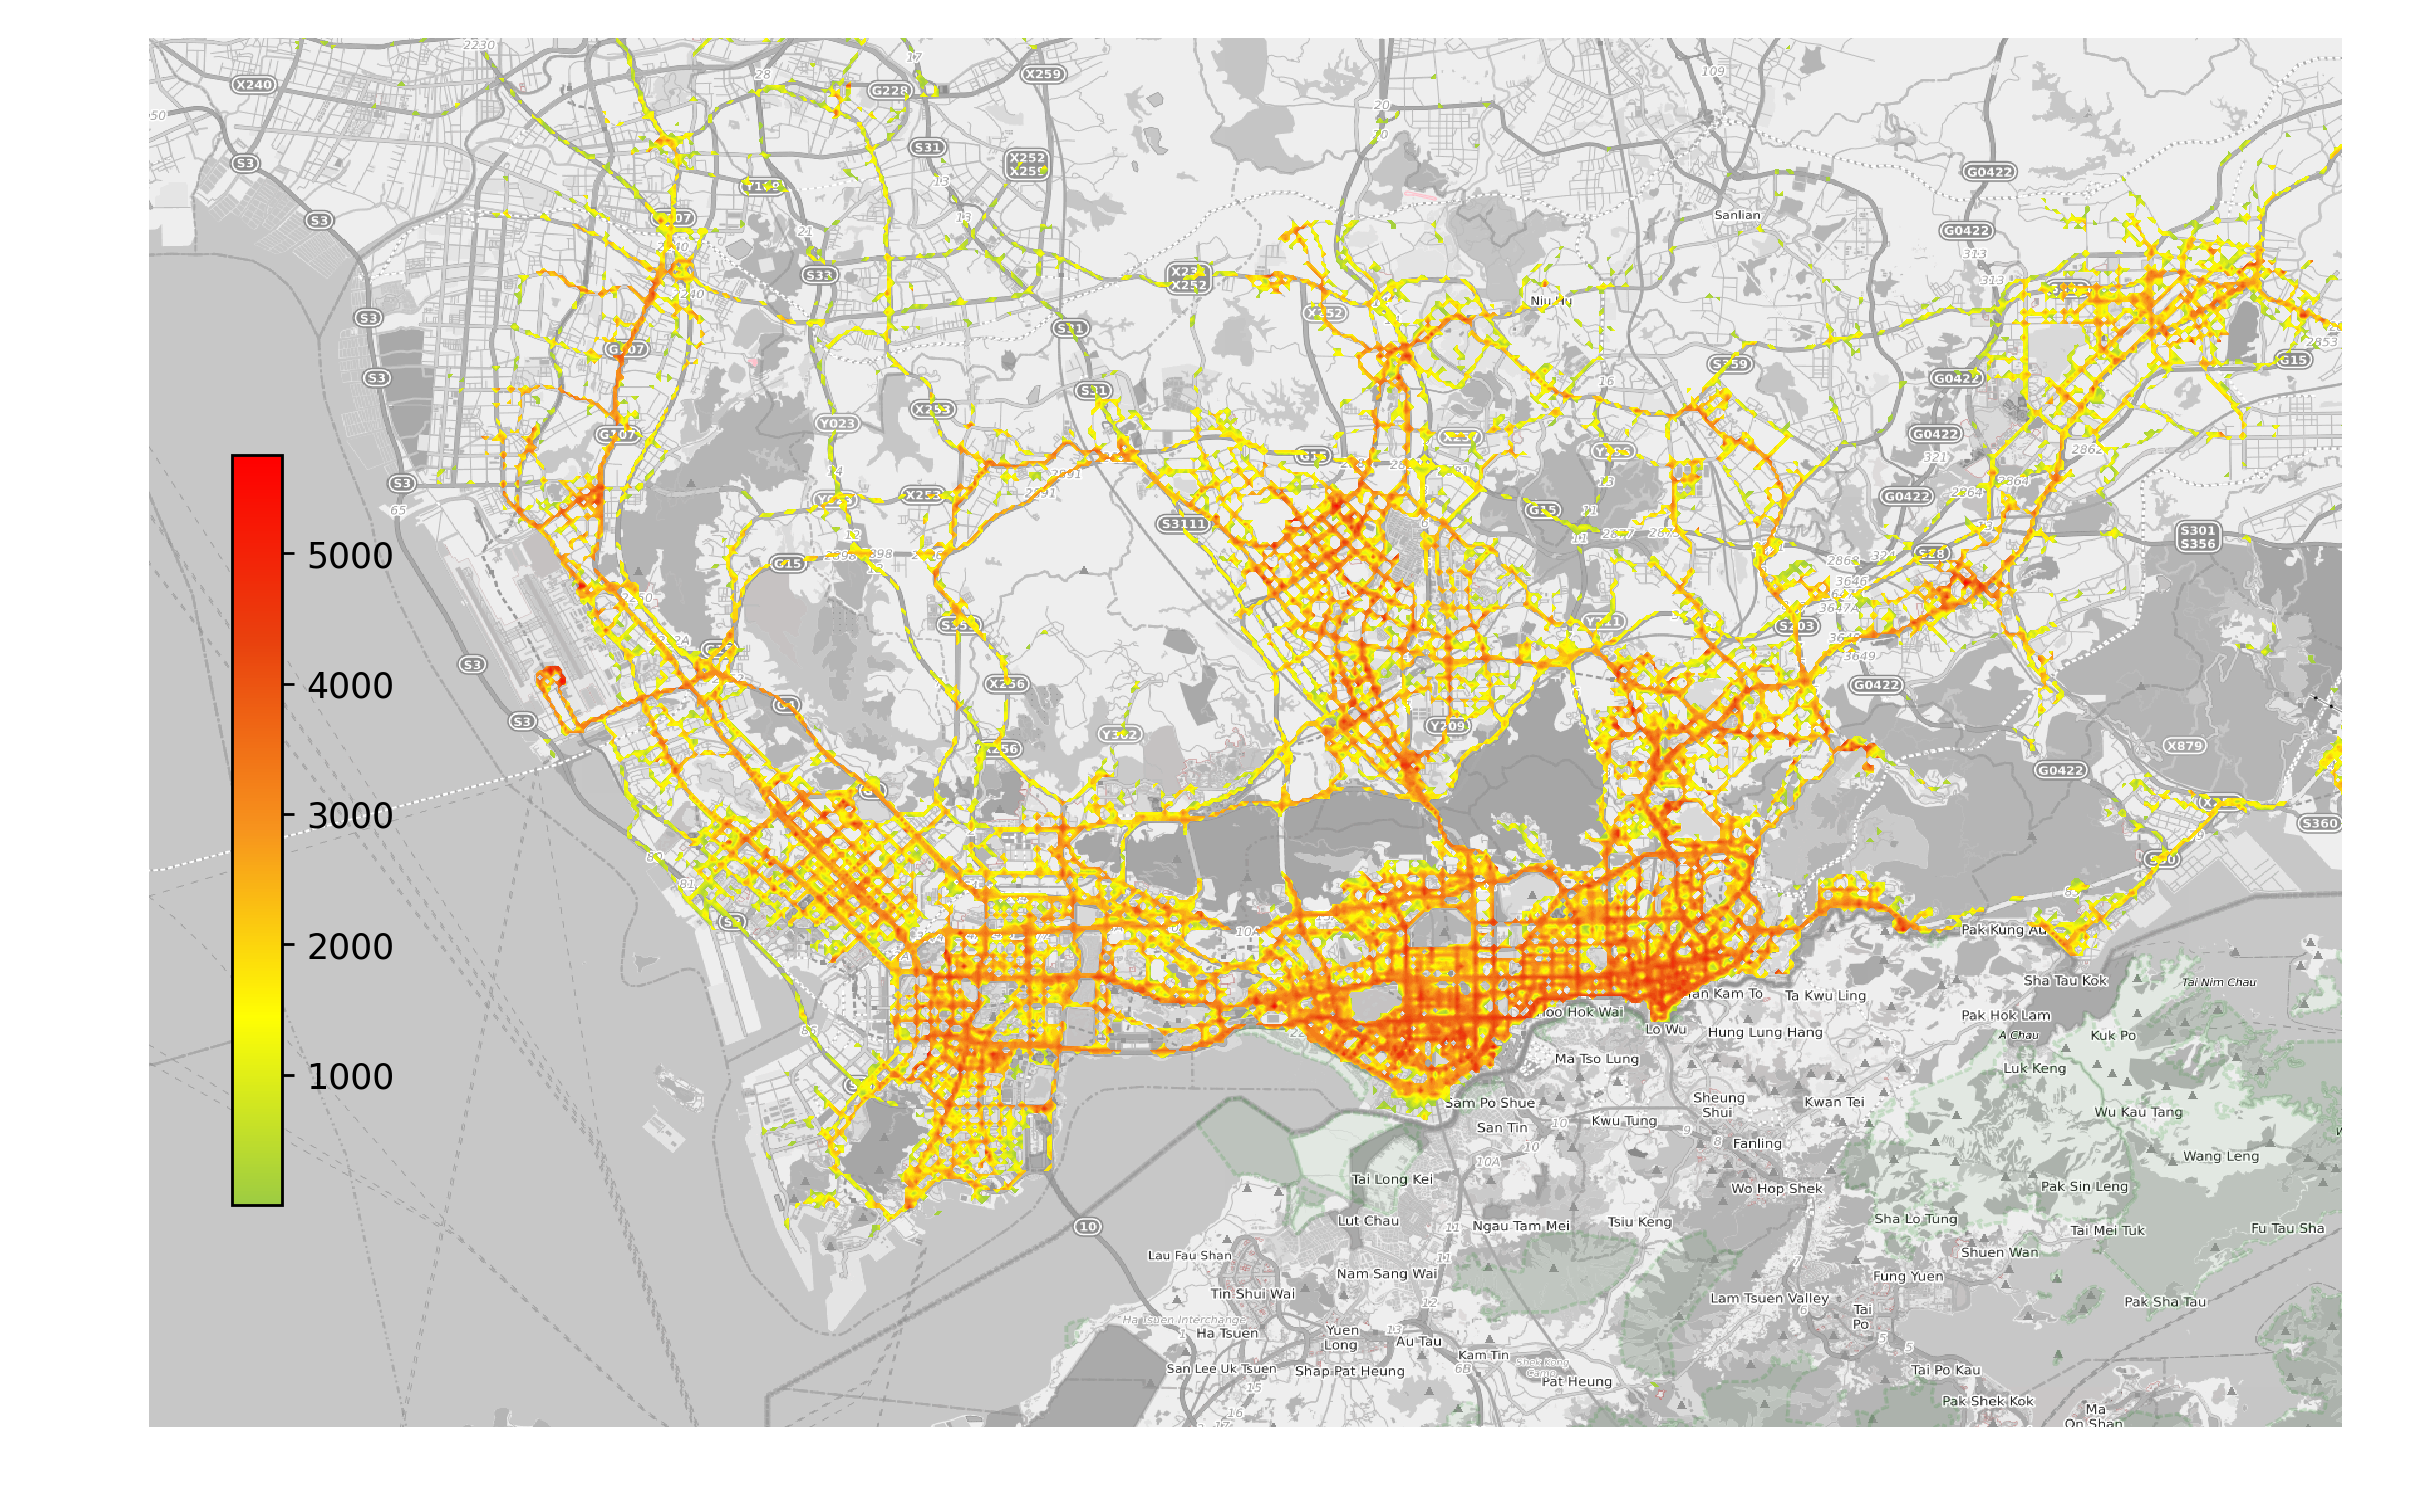

In [25]:
bounds = [113.7, 22.42, 114.3, 22.8]

#导入绘图包
import matplotlib as mpl
import matplotlib.pyplot as plt
import plot_map
import seaborn as sns
import numpy as np

#   -- plot --
fig     = plt.figure(1,(10,10),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))#调整整体空白

#绘制底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)

#colorbar的数据
import matplotlib
seismic_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)

#绘制热力图
plt.contourf(x,y,z, levels=levels, cmap=seismic_cmap,origin = 'lower')


plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

#绘制假的colorbar
plt.imshow([np.exp(levels)], cmap=seismic_cmap)
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
plt.colorbar(cax=cax)


plt.show()